In [66]:
import pandas as pd
import seaborn as sb
import numpy as np

In [3]:
df = pd.read_excel("/Users/Manan/ANZ_Virtual_Internship/ANZ synthesised transaction dataset.xlsx")
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [5]:
df.columns  #so the useful features to predict amount is balance,age,gender and movement

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')


# Feature Engineering

In [36]:
df_new2 = df[['balance','age','movement','amount']]

In [37]:
df_new2.head(7)

,balance,age,movement,amount
0,35.39,26,debit,16.25
1,21.20,26,debit,14.19
2,5.71,38,debit,6.42
3,2117.22,40,debit,40.90
4,17.95,26,debit,3.25
5,1705.43,20,debit,163.00
6,1248.36,43,debit,61.06


In [38]:
df_new2.isnull().sum()

balance     0
age         0
movement    0
amount      0
dtype: int64

In [39]:
#We can make one more feature as part of feature engineering.
df_new2['balance_per_amount'] = df_new2['balance']/df_new2['amount']

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [40]:
df_new2.head()

,balance,age,movement,amount,balance_per_amount
0,35.39,26,debit,16.25,2.177846
1,21.20,26,debit,14.19,1.494010
2,5.71,38,debit,6.42,0.889408
3,2117.22,40,debit,40.90,51.765770
4,17.95,26,debit,3.25,5.523077


# EDA

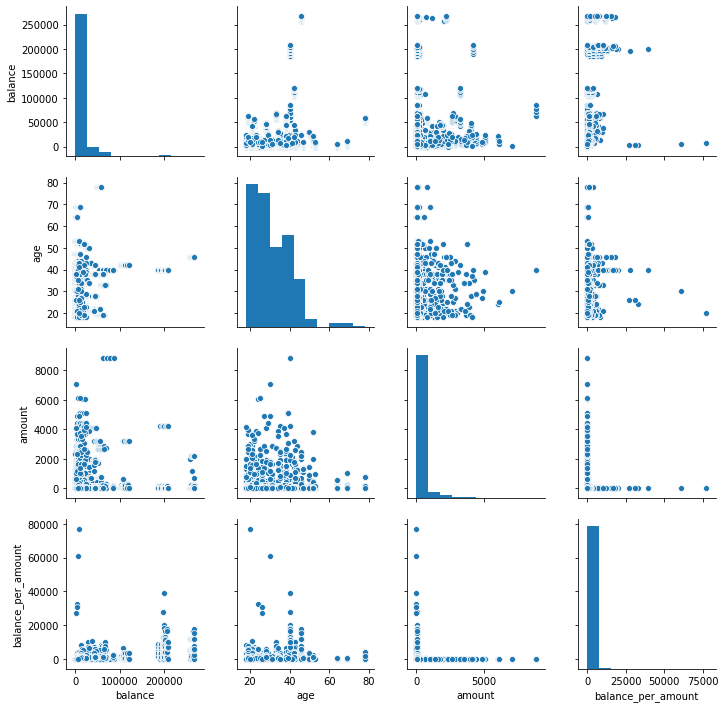

In [41]:
sb.pairplot(data=df_new2)

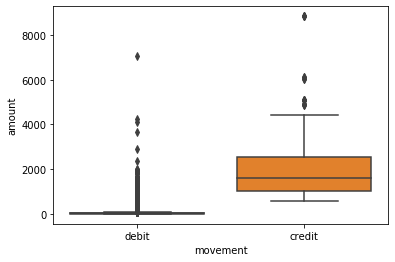

In [42]:
sb.boxplot(df_new2['movement'],df_new2['amount'])  # the relationship is linear

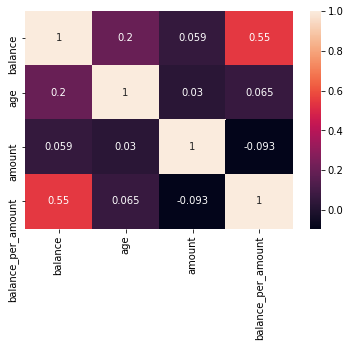

In [43]:
sb.heatmap(df_new2.corr(),annot=True)

In [44]:
#Encode categorical data to continous data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_new2['movement']=le.fit_transform(df_new2['movement'])

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [45]:
df_new2.head()

,balance,age,movement,amount,balance_per_amount
0,35.39,26,1,16.25,2.177846
1,21.20,26,1,14.19,1.494010
2,5.71,38,1,6.42,0.889408
3,2117.22,40,1,40.90,51.765770
4,17.95,26,1,3.25,5.523077


In [46]:
df_new2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 5 columns):
balance               12043 non-null float64
age                   12043 non-null int64
movement              12043 non-null int32
amount                12043 non-null float64
balance_per_amount    12043 non-null float64
dtypes: float64(3), int32(1), int64(1)
memory usage: 423.5 KB


In [47]:
df_new2.describe()

,balance,age,movement,amount,balance_per_amount
count,12043.000000,12043.000000,12043.000000,12043.000000,12043.000000
mean,14704.195553,30.582330,0.926679,187.933588,546.694651
std,31503.722652,10.046343,0.260673,592.599934,1590.920983
min,0.240000,18.000000,0.000000,0.100000,0.008625
25%,3158.585000,22.000000,1.000000,16.000000,76.791690
50%,6432.010000,28.000000,1.000000,29.000000,212.946000
75%,12465.945000,38.000000,1.000000,53.655000,491.440078
max,267128.520000,78.000000,1.000000,8835.980000,77156.900000


In [48]:
#Detecting outliers
Q1 = df_new2.quantile(0.25)
Q3 = df_new2.quantile(0.75)
IQR = Q3 - Q1                           #detecting outliers
print(IQR)
Lower_Whisker = Q1 - 1.5 *IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

balance               9307.360000
age                     16.000000
movement                 0.000000
amount                  37.655000
balance_per_amount     414.648388
dtype: float64
balance              -10802.455000
age                      -2.000000
movement                  1.000000
amount                  -40.482500
balance_per_amount     -545.180892
dtype: float64 balance               26426.98500
age                      62.00000
movement                  1.00000
amount                  110.13750
balance_per_amount     1113.41266
dtype: float64


In [29]:
print(Upper_Whisker)

balance               26426.98500
age                      62.00000
movement                  1.00000
amount                  110.13750
balance_per_amount     1113.41266
dtype: float64


In [49]:
df_new2=df_new2[df_new2['balance'] < 26426.98500]  # On the basis of balance we have handled outliers

In [50]:
df_new2.shape

(10750, 5)

# Modeling Data

In [52]:
from sklearn.linear_model import LinearRegression
X = df_new.drop(labels=['amount'],axis=1)
Y = df_new['amount']

In [54]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=100)

In [55]:
le = LinearRegression()


In [57]:
model = le.fit(xtrain,ytrain)

In [58]:
predicted = model.predict(xtest)

In [60]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(mean_absolute_error(ytest,predicted))
print(mean_squared_error(ytest,predicted))

2.859846862248249e-14
1.1697490699263516e-27


In [61]:
df = pd.DataFrame({'Actual': ytest, 'Predicted': predicted})
df

,Actual,Predicted
4103,99.16,99.16
900,3.10,3.10
237,2.38,2.38
290,71.55,71.55
497,58.67,58.67
4845,32.84,32.84
345,93.06,93.06
501,13.67,13.67
209,86.96,86.96
792,0.24,0.24


Text(0.5, 1.0, 'Predictions')

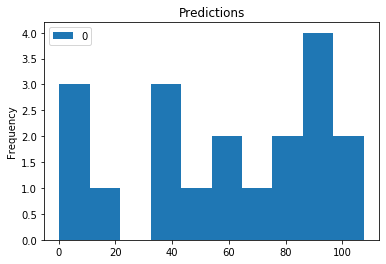

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
pred_Df=pd.DataFrame(predicted)
pred_Df.plot(kind='hist')
plt.title('Predictions')

Text(0.5, 1.0, 'True Values')

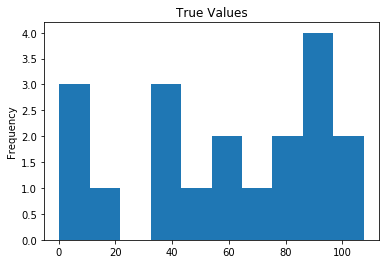

In [63]:
ytest.plot(kind='hist')
plt.title("True Values")

Text(0, 0.5, 'Actual Values')

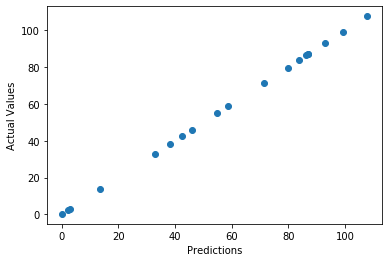

In [64]:
plt.scatter(predicted,ytest)
plt.xlabel("Predictions")
plt.ylabel("Actual Values")

In [65]:
coeff=pd.DataFrame(le.coef_,X.columns,columns=['Coefficients'])
coeff

,Coefficients
balance,1.000000e+00
age,-2.458254e-16
movement,0.000000e+00
balance_per_amount,-9.574851e-16


In [68]:
import sklearn.metrics as m
print('RMSE:', np.sqrt(m.mean_squared_error(ytest, predicted)))
print("R2 Score : ",le.score(xtest,ytest))

RMSE: 3.420159455239407e-14
R2 Score :  1.0
